# TASK 1 : Prediction using Supervised ML

Predict the percentage of a student based on on the no.of study hours

A simple linear regression task that includes hours and scores

#### Author - Nikhil Gond


In [60]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline


In [61]:
#reading data
data=pd.read_csv('http://bit.ly/w-data')
print('Data Imported')

Data Imported


# Data Preprocessing


In [62]:
# printing head (first few rows)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [63]:
# datatype of columns
data.dtypes 

Hours     float64
Scores      int64
dtype: object

In [64]:
data.shape # here our data consist of 25 rows and 2 columns

(25, 2)

In [65]:
data.describe() # initial statistical details

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [66]:
data.isnull().sum() #Our data has no missing values

Hours     0
Scores    0
dtype: int64

# Data Visualization

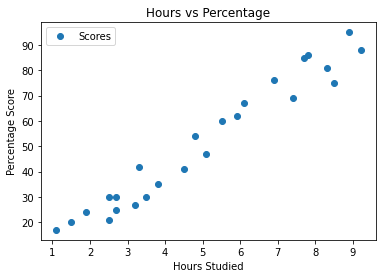

Here we can see that there is a Positive linear relation betweeen No.of hours studied and percentage obtained


In [67]:
# plotting our data
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()
comment=('Here we can see that there is a Positive linear relation betweeen No.of hours studied and percentage obtained')
print(comment)


## Preparing the data



In [68]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [69]:
### Training data and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

## Training the Algorithm

In [70]:
reg=LinearRegression()
reg.fit(x_train,y_train) # for fitting the model

LinearRegression()

In [71]:
reg.score(x_train,y_train)

0.9484997422695115

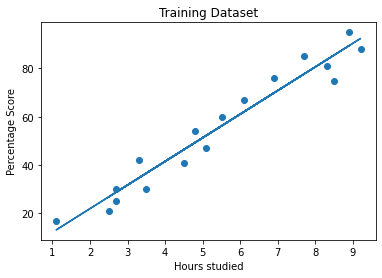

Here we get an accuracy of 94.80


In [73]:
# Visualizing training dataset
plt.scatter(x_train,y_train)
plt.title('Training Dataset')
plt.plot(x_train,reg.predict(x_train))
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

reg.score(x_train,y_train) 

comment=('Here we get an accuracy of 94.80')
print(comment)

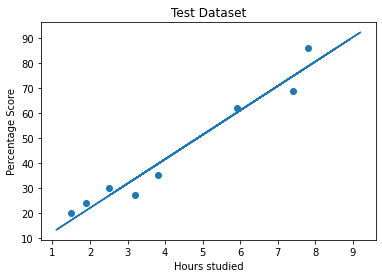

In [74]:
# visualizing the test set results
plt.scatter(x_test,y_test)
plt.title('Test Dataset')
plt.plot(x_train,reg.predict(x_train))
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()


## Slope and plotting regression line


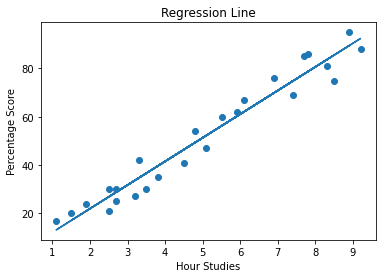

In [75]:
# Plotting the regression line 
line=reg.coef_*x+reg.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.title('Regression Line')
plt.xlabel('Hour Studies')
plt.ylabel('Percentage Score')
plt.show()

In [76]:
# Values of Intercept and Coefficient
print('Intercept is :',reg.intercept_)
print('Coefficient is :',reg.coef_)



Intercept is : 2.370815382341881
Coefficient is : [9.78856669]


Here we can see that if a student studies for one more hour than there is an increase of 9.78% in Total score

# Prediction values

In [77]:
#prediction of testing data
y_pred=reg.predict(x_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

Here y_pred is a numpy array which consist of all the predicted values for the input values in x_test series.

In [78]:
#Comparing Actual vs Predicted Values

df=pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [79]:
# predicting the Score
data=np.array(9.25)
data=data.reshape(-1,1)
pred=reg.predict(data)
print('If the student is studying for 9.25 hrs/day , the score is {}.'.format(pred))

If the student is studying for 9.25 hrs/day , the score is [92.91505723].


# Evaluating the Model

In [80]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.419727808027652


In [81]:
from sklearn.metrics import r2_score
print('The R square of the model is:',r2_score(y_test,y_pred))

The R square of the model is: 0.9568211104435257


## Conclusion: Hence, it can be concluded that, if a person studies for 9.25 hrs the predicted score will be 92.91